# Creating surfaces
In this notebook we create a surface mesh from a 3D dataset of a Gastruloid. The used example data is a curtesy of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode).

In [1]:
import napari_process_points_and_surfaces as nppas

import stackview
from skimage.io import imread
import pyclesperanto_prototype as cle
import vedo

In [2]:
filename = "C:/structure/data/Example Gastruloids DAPI Channel/19052022_mGast_B1-2_H5_NMRI_ES+LIF_01.vsi - 002 640-mFoxa2, 561-gSox2, 488-rbT, 405-Dapi-1.tif"

In [3]:
image = imread(filename)
image.shape

(61, 2048, 2048)

In [4]:
# todo: as soon as this issue is solved: We could read 
# voxel size from the image using AICSImageIO
# https://github.com/AllenCellModeling/aicsimageio/issues/450
voxel_size = [5, 0.325, 0.325]

StackViewNDArray([[[100, 109, 104, ..., 100,  99, 100],
                   [103, 101,  97, ..., 100, 101, 101],
                   [ 99, 112, 101, ..., 112,  96, 102],
                   ...,
                   [101, 103, 103, ..., 104,  94, 100],
                   [103, 109, 103, ..., 102, 105, 103],
                   [ 99, 106,  99, ...,  98,  97, 101]],

                  [[104, 103, 103, ..., 101,  97, 100],
                   [106, 103, 100, ...,  97, 101,  97],
                   [101, 103, 106, ..., 103, 101, 101],
                   ...,
                   [105, 103, 101, ..., 107,  97, 106],
                   [ 99, 108, 106, ...,  98, 101, 101],
                   [105, 113, 101, ..., 105,  95, 104]],

                  [[104,  99, 100, ..., 107, 104,  97],
                   [101, 103,  97, ...,  93, 103,  97],
                   [108, 100, 103, ..., 108, 104,  98],
                   ...,
                   [103, 102,  99, ..., 103,  95, 103],
                   [ 99, 101, 101, ..., 102, 102,  98],
                   [105, 102, 101, ...,  99,  95, 101]],

                  ...,

                  [[100, 101, 104, ..., 104, 100, 100],
                   [103, 100, 100, ...,  97, 103,  98],
                   [102, 113, 106, ..., 103, 101,  97],
                   ...,
                   [101, 103, 104, ..., 101,  95, 104],
                   [101, 102, 104, ..., 101,  98, 101],
                   [102, 106,  99, ...,  99,  99, 100]],

                  [[103, 105, 100, ..., 103, 100,  99],
                   [102,  97,  97, ..., 100, 103, 102],
                   [ 99, 103, 106, ...,  99, 103, 101],
                   ...,
                   [ 97, 103, 100, ..., 104,  94, 104],
                   [ 99, 103, 101, ...,  98, 101, 101],
                   [102,  99, 100, ..., 101,  97, 103]],

                  [[107, 103, 103, ..., 101,  97, 101],
                   [101,  99, 103, ...,  99, 101,  95],
                   [101, 101, 101, ..., 106, 104, 102],
                   ...,
                   [101, 103, 106, ..., 103,  97, 103],
                   [ 98, 101, 101, ..., 101, 102,  97],
                   [102, 110, 100, ...,  99,  99, 103]]], dtype=uint16)
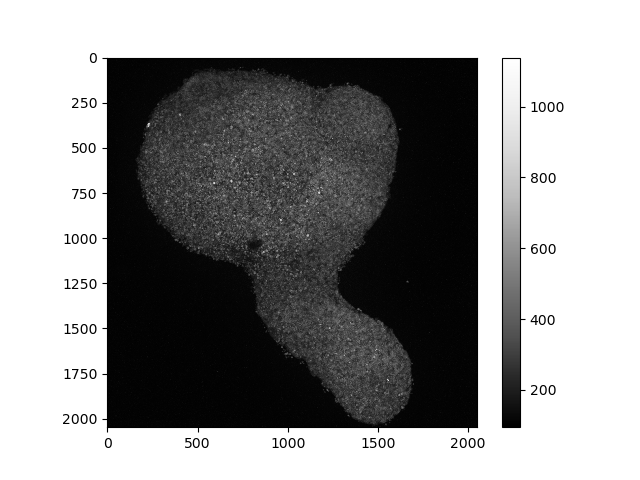
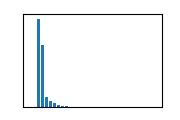

In [5]:
stackview.insight(image)

## Scaling data to be isotropic
We first scale the dataset to be [isotropic](https://en.wikipedia.org/wiki/Anisotropy). This simplifies processing of the image and the surface later, because voxels have the same size in all directions.

cl.OCLArray([[[ 72.70544 ,  68.77293 ,  72.14338 , ...,  72.03148 ,
          70.14584 ,  71.43759 ],
        [ 69.26094 ,  70.94339 ,  72.35672 , ...,  71.08516 ,
          71.9253  ,  71.574455],
        [ 74.43001 ,  70.905624,  72.4198  , ...,  70.21413 ,
          68.892166,  71.74875 ],
        ...,
        [ 73.17258 ,  72.26262 ,  69.84618 , ...,  69.529366,
          71.22881 ,  71.88971 ],
        [ 71.81741 ,  71.38723 ,  71.11546 , ...,  71.168724,
          70.44629 ,  72.79523 ],
        [ 71.738464,  69.86166 ,  69.200806, ...,  70.03434 ,
          73.296425,  71.11338 ]],

       [[103.6695  ,  98.54684 , 103.26863 , ..., 102.87198 ,
         100.424255, 101.92066 ],
        [ 99.16573 , 101.49411 , 103.08508 , ..., 101.54988 ,
         102.80255 , 102.52651 ],
        [105.65398 , 101.14174 , 103.42747 , ..., 100.33216 ,
          99.23868 , 102.740364],
        ...,
        [104.322266, 103.31319 ,  99.78475 , ...,  99.66196 ,
         101.78087 , 102.80661 ],
        [102.689514, 102.24805 , 101.993866, ..., 101.81415 ,
         100.978516, 103.82889 ],
        [102.71837 , 100.0694  ,  99.3172  , ..., 100.417435,
         104.88568 , 101.54497 ]],

       [[102.44763 ,  99.29233 , 103.627625, ..., 102.302734,
         100.83203 , 100.951416],
        [ 99.601135, 101.62424 , 101.52701 , ..., 101.10338 ,
         102.55664 , 103.16615 ],
        [102.54138 , 100.101395, 102.85867 , ...,  99.99553 ,
         102.0293  , 103.24107 ],
        ...,
        [103.04025 , 103.17794 ,  99.36496 , ..., 100.538025,
         101.43457 , 102.776306],
        [102.60547 , 102.8457  , 103.11914 , ..., 101.93555 ,
         101.875   , 102.728516],
        [103.19049 , 100.679504, 100.68417 , ..., 101.42406 ,
         105.11914 , 100.92085 ]],

       ...,

       [[102.15074 ,  98.99609 , 101.268555, ...,  98.74126 ,
          99.756165,  99.63721 ],
        [100.7444  , 102.90138 , 100.39299 , ..., 101.944145,
          98.44874 , 102.69209 ],
        [107.88614 ,  96.713264, 104.54349 , ...,  98.32249 ,
         102.06441 , 101.892   ],
        ...,
        [102.64293 , 101.85871 , 101.43722 , ...,  99.75172 ,
          97.04161 , 103.033226],
        [102.602325, 101.88083 , 102.13054 , ..., 102.20553 ,
         101.89844 , 100.9686  ],
        [101.174835, 100.83765 ,  99.80696 , ..., 102.8124  ,
         104.29838 ,  99.59561 ]],

       [[102.29286 , 100.29877 , 101.81445 , ...,  99.77864 ,
         100.50946 , 101.08722 ],
        [100.91753 , 102.921936, 100.87351 , ..., 102.5633  ,
         100.49462 , 101.87055 ],
        [104.39694 ,  98.15191 , 103.353546, ...,  98.48501 ,
         101.642624, 101.95291 ],
        ...,
        [101.00339 , 102.48913 , 101.62531 , ...,  98.96473 ,
          98.73964 , 102.44839 ],
        [100.99924 , 103.65823 , 103.16243 , ..., 102.534706,
         101.10156 , 100.29312 ],
        [102.166115, 100.9124  ,  99.80852 , ..., 104.822716,
         103.57076 , 100.259186]],

       [[ 92.00013 ,  90.9957  ,  91.84418 , ...,  90.348465,
          90.81238 ,  91.803986],
        [ 90.78551 ,  92.48287 ,  90.95446 , ...,  92.56664 ,
          91.67572 ,  90.967125],
        [ 91.42764 ,  89.15909 ,  92.04965 , ...,  88.59285 ,
          91.03348 ,  91.63964 ],
        ...,
        [ 89.63323 ,  92.507645,  91.431564, ...,  88.37987 ,
          89.86305 ,  91.64682 ],
        [ 89.654236,  94.33594 ,  93.38486 , ...,  92.344284,
          90.29297 ,  89.64897 ],
        [ 92.46218 ,  90.714195,  89.67277 , ...,  95.54013 ,
          92.558365,  90.526665]]], dtype=float32)
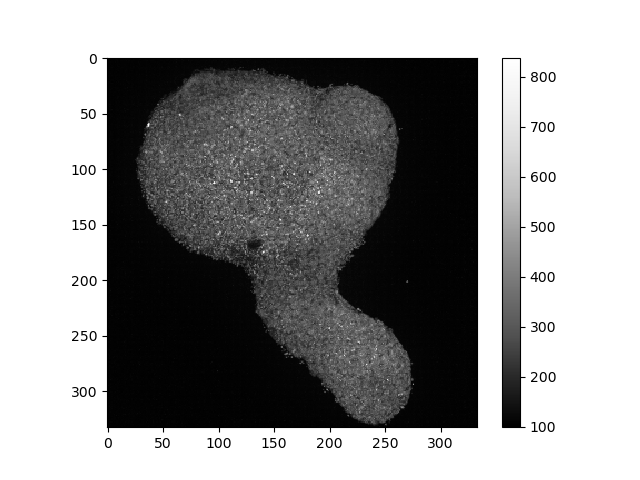
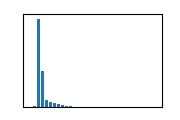

In [6]:
zoom = 0.5

scaled = cle.scale(image, 
                   factor_x=voxel_size[2] * zoom,
                   factor_y=voxel_size[1] * zoom,
                   factor_z=voxel_size[0] * zoom,
                   auto_size=True,
                   linear_interpolation=True
                  )
scaled

## Binarization
We then turn the dataset into a binary image to turn it into a surface afterwards.

cl.OCLArray([[[86.000946, 85.98568 , 85.97294 , ..., 85.331314, 85.34514 ,
         85.35893 ],
        [86.000755, 85.9883  , 85.97837 , ..., 85.32134 , 85.33412 ,
         85.34691 ],
        [86.002304, 85.99268 , 85.98553 , ..., 85.31225 , 85.3239  ,
         85.33571 ],
        ...,
        [85.68542 , 85.66945 , 85.65363 , ..., 85.41102 , 85.403656,
         85.39528 ],
        [85.70312 , 85.68585 , 85.66874 , ..., 85.40533 , 85.39846 ,
         85.390434],
        [85.72074 , 85.70218 , 85.68377 , ..., 85.399765, 85.3934  ,
         85.38566 ]],

       [[87.19467 , 87.17971 , 87.16731 , ..., 86.53252 , 86.54607 ,
         86.55962 ],
        [87.19561 , 87.18351 , 87.1739  , ..., 86.523575, 86.53607 ,
         86.54866 ],
        [87.19843 , 87.18907 , 87.18219 , ..., 86.51554 , 86.526955,
         86.538536],
        ...,
        [86.891266, 86.87549 , 86.85992 , ..., 86.60855 , 86.599365,
         86.589195],
        [86.908066, 86.89099 , 86.874115, ..., 86.60171 , 86.59296 ,
         86.582985],
        [86.92479 , 86.906456, 86.888306, ..., 86.59504 , 86.58669 ,
         86.57694 ]],

       [[88.38206 , 88.36737 , 88.355194, ..., 87.72757 , 87.74087 ,
         87.75422 ],
        [88.3841  , 88.37221 , 88.362816, ..., 87.71973 , 87.73199 ,
         87.74433 ],
        [88.38808 , 88.37891 , 88.37227 , ..., 87.71272 , 87.72389 ,
         87.73523 ],
        ...,
        [88.0903  , 88.07481 , 88.05948 , ..., 87.799934, 87.78894 ,
         87.77687 ],
        [88.106125, 88.08934 , 88.0727  , ..., 87.79196 , 87.78126 ,
         87.76933 ],
        [88.121895, 88.10382 , 88.08598 , ..., 87.78422 , 87.77385 ,
         87.76201 ]],

       ...,

       [[96.922585, 96.90059 , 96.880325, ..., 96.559105, 96.57123 ,
         96.58422 ],
        [96.91808 , 96.898735, 96.881065, ..., 96.56908 , 96.580826,
         96.5934  ],
        [96.91428 , 96.89749 , 96.882385, ..., 96.57983 , 96.591156,
         96.603325],
        ...,
        [96.94977 , 96.9333  , 96.91748 , ..., 96.61045 , 96.58591 ,
         96.56098 ],
        [96.95414 , 96.93715 , 96.92086 , ..., 96.59001 , 96.56476 ,
         96.538895],
        [96.958176, 96.94069 , 96.92391 , ..., 96.5707  , 96.544716,
         96.517914]],

       [[96.52125 , 96.499084, 96.478676, ..., 96.150406, 96.16267 ,
         96.17585 ],
        [96.51659 , 96.49711 , 96.47932 , ..., 96.160545, 96.17239 ,
         96.18511 ],
        [96.51261 , 96.49575 , 96.48057 , ..., 96.17151 , 96.18289 ,
         96.19516 ],
        ...,
        [96.55268 , 96.53475 , 96.5175  , ..., 96.209045, 96.184784,
         96.16012 ],
        [96.55747 , 96.53895 , 96.52116 , ..., 96.18932 , 96.16441 ,
         96.138855],
        [96.56197 , 96.54285 , 96.5245  , ..., 96.17075 , 96.14517 ,
         96.11874 ]],

       [[96.116875, 96.09459 , 96.074066, ..., 95.74138 , 95.75396 ,
         95.76751 ],
        [96.11206 , 96.092514, 96.07466 , ..., 95.75154 , 95.76364 ,
         95.77666 ],
        [96.10798 , 96.09107 , 96.07586 , ..., 95.76255 , 95.77414 ,
         95.78664 ],
        ...,
        [96.15374 , 96.134346, 96.11568 , ..., 95.80573 , 95.78181 ,
         95.757484],
        [96.15896 , 96.138885, 96.11959 , ..., 95.78676 , 95.76224 ,
         95.73707 ],
        [96.16392 , 96.14317 , 96.12324 , ..., 95.76896 , 95.74382 ,
         95.71783 ]]], dtype=float32)
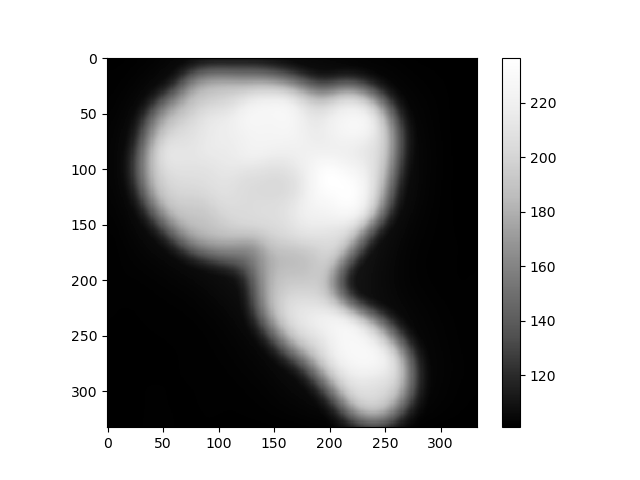
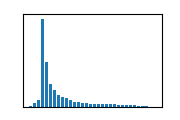

In [7]:
sigma = 10
blurred = cle.gaussian_blur(scaled, 
                            sigma_x=sigma,
                            sigma_y=sigma,
                            sigma_z=sigma,
                           )
blurred

cl.OCLArray([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
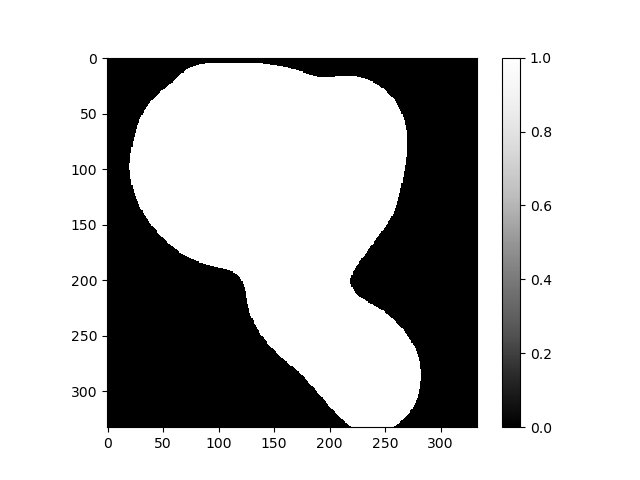
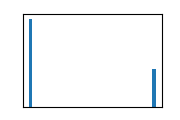

In [8]:
binary = blurred > blurred.max() * 0.5
binary

## Generating surfaces
We first generate a surface forom the binary image.

In [9]:
surface = nppas.all_labels_to_surface(binary)

The resulting object is visualized in Jupyter notebooks like this:

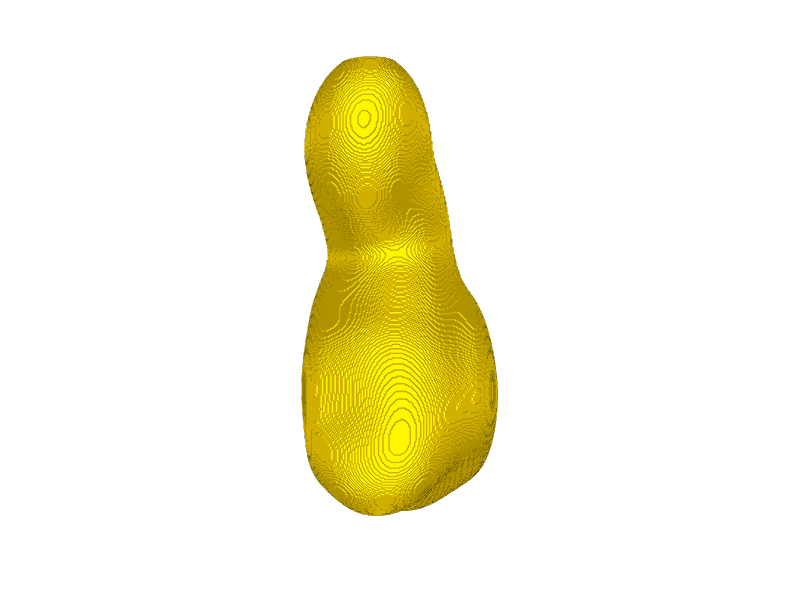

(array([[  4.5,  91. , 129. ],
        [  5. ,  90.5, 129. ],
        [  5. ,  91. , 128.5],
        ...,
        [150.5, 115. , 149. ],
        [150.5, 115. , 150. ],
        [150.5, 115. , 151. ]]),
 array([[     2,      1,      0],
        [     4,      3,      0],
        [     4,      0,      1],
        ...,
        [249176, 247824, 247826],
        [249176, 247826, 249177],
        [249177, 247826, 247765]], dtype=int64))

In [10]:
surface

## Saving surfaces to disk

In [11]:
mesh = nppas.to_vedo_mesh(surface)

vedo.write(mesh, "gastruloid.ply")

<Mesh(0x000001CF70023FF0) at 0x000001CF88D97FA0>

## Loading meshes from disk

In [12]:
new_mesh = vedo.load("gastruloid.ply")
new_mesh

<Mesh(0x000001CF70026980) at 0x000001CF88DDD9A0>

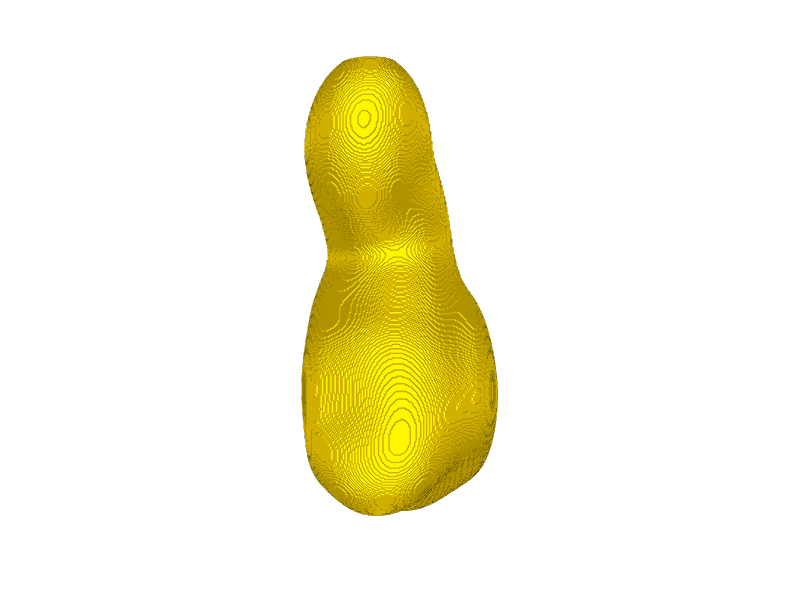

(array([[  4.5,  91. , 129. ],
        [  5. ,  90.5, 129. ],
        [  5. ,  91. , 128.5],
        ...,
        [150.5, 115. , 149. ],
        [150.5, 115. , 150. ],
        [150.5, 115. , 151. ]], dtype=float32),
 array([[     2,      1,      0],
        [     4,      3,      0],
        [     4,      0,      1],
        ...,
        [249176, 247824, 247826],
        [249176, 247826, 249177],
        [249177, 247826, 247765]], dtype=int64))

In [13]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface